In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [84]:
data = pd.read_csv('employee_survey2.csv')

In [86]:
data['Promoted'] = data['JobLevel'].apply(lambda x: 1 if x == 'Senior' else 0)

In [88]:
data = data.drop(columns=['JobLevel'])

In [90]:
X = data.drop(columns=['Promoted'])
y = data['Promoted']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
categorical_features = ['Gender', 'MaritalStatus', 'Dept', 'EmpType', 'EduLevel', 'haveOT']
numerical_features = ['Age', 'Experience', 'WLB', 'WorkEnv', 'PhysicalActivityHours', 'Workload', 'Stress', 'SleepHours', 'TrainingHoursPerYear', 'JobSatisfaction']


In [96]:
numerical_transformer = StandardScaler()

In [98]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [100]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [102]:
model = RandomForestClassifier(random_state=42)

In [104]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [106]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [108]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

example = X_test.iloc[0:1]
prediction = pipeline.predict(example)
print("Example Prediction:", "Promoted" if prediction[0] == 1 else "Not Promoted")

Accuracy: 0.995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       167
           1       0.97      1.00      0.99        33

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

Example Prediction: Not Promoted


In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


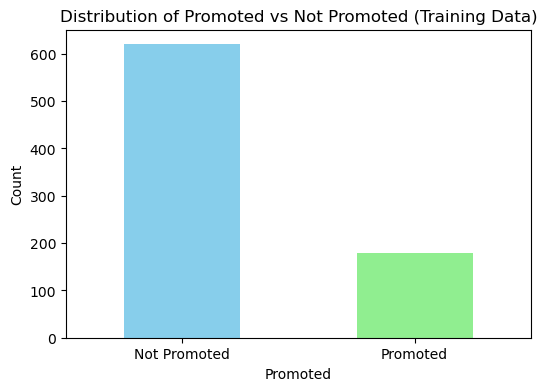

In [112]:
plt.figure(figsize=(6, 4))
y_train.value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Promoted vs Not Promoted (Training Data)')
plt.xlabel('Promoted')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Promoted', 'Promoted'], rotation=0)
plt.show()

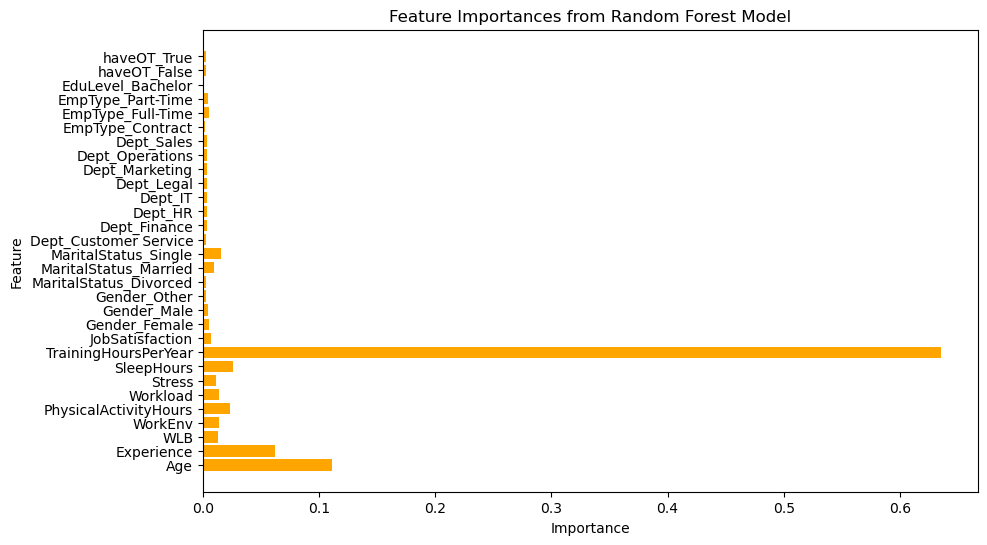

In [116]:
feature_importances = model.feature_importances_

feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='orange')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

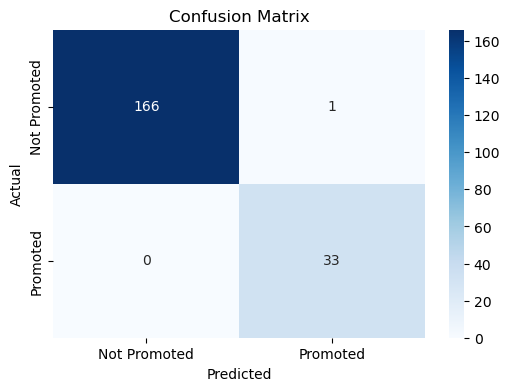

In [118]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Promoted', 'Promoted'], yticklabels=['Not Promoted', 'Promoted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()